In [ ]:
import nltk
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import re

nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
def clean_comment(text):
    """
    Function to clean the comment text.
    Removes URLs, special characters, and unnecessary whitespace.
    """
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)  # Remove special characters
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra whitespaces

    return text


In [ ]:
file_paths = ['tate_candace.csv', 'tate_piers_comments.csv']

In [ ]:
file_path = file_paths[0]
df = pd.read_csv(file_path)

removal_words = ['she', 'her', 'Candace', 'Candice']
# removal_words = ['Pierce', 'Piers', 'Morgan']
keep_words = ['Andrew']

In [ ]:
def clean_df(df, removal_words, keep_words):
  df['Comment'] = df['Comment'].astype(str).apply(clean_comment)

  for removal_word in removal_words:
    df = df[~df['Comment'].str.contains(removal_word, case=False)]


  df = df[df['Comment'].str.contains('Andrew', case=False) | df['Comment'].str.contains('Tate', case=False)]

  df.reset_index(drop=True, inplace=True)

  return df

In [ ]:
df = clean_df(df, removal_words, keep_words)

In [ ]:
df

,Comment,Anonymized Author,Published At,Likes,Reply Count
0,Despite disagreeing with Andrew Tate he says m...,7bf2525f514bb09f42ad102a14b4f641317f921f8389a2...,2023-12-25T08:05:43Z,0,0
1,I am definitely warming up to Andrew Its amazi...,506f0bae7d7f88fca7dfca3d23d33709d79ca73c318c15...,2023-12-24T22:30:09Z,0,0
2,I absolutely love these 2 People like Mrs Owen...,457923ee8a106ea3f3ddb944dbe397efbf65637adee7cd...,2023-12-24T14:33:31Z,0,0
3,Team tate well expressed lad,09e34e7f3e4d9e1c31c769c7f4a0aec3fd426a1bb4fa23...,2023-12-23T08:45:48Z,0,0
4,I never sat down to watch an Andrew the video ...,8bb7ece4ead33f727fffde834dc2be91824dad9f82dcbc...,2023-12-21T23:27:51Z,0,0
...,...,...,...,...,...
1368,Hahaha ei Tate has some funny takes,b1029817f669272e6fc8b2363a296278bdcc6eaee5c0b2...,2023-07-31T01:05:23Z,1,0
1369,Sad Tate that you think the God of the Christi...,83e3191de2d0527803e056f184b6592c2686808df7a588...,2023-07-31T01:05:17Z,2,5
1370,As a Muslim Andrew you gotta be sorry to God f...,72551f3f756d81d3b665cc4085bed7a1c2f1c994af66b5...,2023-07-31T01:03:56Z,1,1
1371,Andrew and tristan are awesome,f57120745e7b660553028fba64d790a8245dd12ff0788b...,2023-07-31T01:00:15Z,0,0


In [ ]:
from collections import Counter
import nltk
from nltk.corpus import stopwords
import string

# Ensure you have the necessary NLTK data
nltk.download('stopwords')

# Function to create a list of words from the comments
def create_word_list(text):
    words = text.split()
    return words

# Combining all comments into a single string
all_comments = ' '.join((df['Comment']))

# Splitting the combined string into a list of words
word_list = create_word_list(all_comments)

# Removing stopwords and punctuation
stop_words = set(stopwords.words('english'))
word_list = [word for word in word_list if word.lower() not in stop_words and word.isalpha()]

# Counting the frequency of each word
word_freq = Counter(word_list)

# Displaying the 20 most common words
print("20 Most Common Words:")
for word, freq in word_freq.most_common(20):
    print(word, ":", freq)


20 Most Common Words:
Tate : 792
Andrew : 770
like : 198
interview : 186
man : 159
tate : 152
people : 136
men : 125
dont : 118
Im : 117
love : 97
women : 95
see : 93
think : 86
know : 85
would : 78
one : 77
really : 77
good : 74
want : 72


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


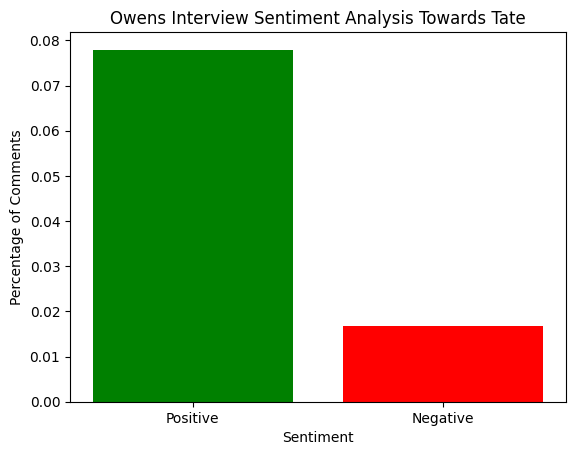

0.09468317552804079

In [ ]:
sid = SentimentIntensityAnalyzer()

positive_comments = []
negative_comments = []

for index, row in df.iterrows():
    comment = row['Comment']
    sentiment_score = sid.polarity_scores(comment)['compound']
    if sentiment_score >= 0.9:
        positive_comments.append(comment)
    elif sentiment_score <= -0.9:
        negative_comments.append(comment)

positive_count = len(positive_comments)
negative_count = len(negative_comments)

plt.bar(['Positive', 'Negative'], [positive_count / len(df), negative_count / len(df)], color=['green', 'red'])
plt.xlabel('Sentiment')
plt.ylabel('Percentage of Comments')
plt.title('Owens Interview Sentiment Analysis Towards Tate')
plt.show()

positive_count / len(df) + negative_count / len(df)

In [ ]:
positive_comments

['I absolutely love these 2 People like Mrs Owens and Mr Tate give me hope for humanity I do pray Andrew converts to Christianity though',
 'Im 36 I live in MA a blue state Im also a Barber Every person in my life that I know and trust of all walks of life and ages politics align with common sense and ultimately conservatism if given a choice between the 2 I consider liberalism and woke culture to be for people who have no life experience and if they faced any of the issues or situation they have opinions on they certainly wouldnt act the way that theyre advocating It Im told Im very open minded I highly value critical thinking Ok I am very lucky to be able to have all kinds of conversations on uncomfortable topics all day long I am also a huge proponent of culture and popular culture and it was nice to hear you speak on culture in the way that I feel about it I think one of the biggest problems with current politics is that its become so extreme and emotional and on the Internet we ar

In [ ]:
df[df['Comment'].str.contains('gym')]

,Comment,Anonymized Author,Published At,Likes,Reply Count
451,Tate is the reason i got back into the gym,cb893f7ca866347ba5ac5ac41c2bc96408510230a6a5d9...,2023-08-13T21:05:08Z,1,0
605,Ive been diagnosed bipolar 1 for over 10 year ...,6b03c3aca29ebdbf6e30981db790370635d8778c39e56a...,2023-08-06T19:19:52Z,124,9
1309,Every teenage boy I know who follows Andrew go...,31491cdcb6aa8c0741263a58a14dae9b8587e130440fab...,2023-07-31T06:23:04Z,0,0


In [ ]:
df.iloc[605]['Comment']

'Ive been diagnosed bipolar 1 for over 10 year been on meds since i was a child Andrew is 100 right Get in the gym drink water open a bible and get up what we go through sucks but we cant keep living they way we have lived we arent victims anymore unless we choose to be'

In [ ]:
df.iloc[185]['Comment']

'Hi Ms Owens and hi Mr Tate I just really want to meet you Mr Tate because I want to know how you work and I learned know how you work out and I want to be strong like you I want to meet you all its gonna be like a vacation or something but at the same time I want to work hard I want to know how you get money I just want to be your pupil because I feel like that at school people arent respecting me enough and Im not trying to impress my friends or anything Im not gonna tell them this every year happen if it does but I just want to let know that if you see this message I will not take no as an answer I really want to know if I can meet you again I dont want to impress I need friends Im 12 youre 30 something doesnt matter If I meet you when youre 50 are 60 are 70 I want to know how you get your money because me as a young guy I just wanted to know'

# Piers

In [ ]:
import nltk
import pandas as pd
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
file_path = 'tate_piers_comments.csv'
df = pd.read_csv(file_path)

In [ ]:
import re

def clean_comment(text):
    """
    Function to clean the comment text.
    Removes URLs, special characters, and unnecessary whitespace.
    """
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)  # Remove special characters
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra whitespaces

    return text

# Applying the cleaning function to the 'Comment' column
df['Comment'] = df['Comment'].astype(str).apply(clean_comment)

# removes comments mentioning Candace Owens
df = df[~df['Comment'].str.contains('Piers', case=False)]
df = df[~df['Comment'].str.contains('Morgan', case=False)]
df = df[~df['Comment'].str.contains('Pierce', case=False)]
df.reset_index(drop=True, inplace=True)
df

,Comment,Anonymized Author,Published At,Likes,Reply Count
0,What babies names,3d16a803bd99d942d15b76fb4c6c2a3bae9583f824eab7...,2023-11-25T20:00:22Z,0.0,0.0
1,And when Israel fires gun during Ramadan Was t...,354a96d9cb471c3ee85411ed6d388c37bbb1ffd2ade94b...,2023-11-24T09:42:12Z,0.0,0.0
2,Have a conversation great piece of advice,327ed320d65145cb05729cbff1614b99f8bfd334c67176...,2023-12-08T11:26:44Z,0.0,0.0
3,May Allah give you stead fast Tate,08f721db018dbdc288535227b09a60abebf542eb146c9b...,2023-11-26T06:51:12Z,0.0,0.0
4,Andrewtate you are a real man thats we all lik...,d4a1fd582dc0da79dd113d6d082507510a630d398d8915...,2023-11-26T05:53:37Z,0.0,0.0
...,...,...,...,...,...
22706,Andrews mind is so twisted I feel bad for him,771fd8df6654f897cc7824e60bdc0345e777c7cb60bbee...,2023-11-24T17:10:56Z,1.0,0.0
22707,Something of Ali Gi around this conversation,d29af2ae9d9b9efd32858bae4b0043dcc84262973b5370...,2023-12-17T13:48:09Z,0.0,0.0
22708,,865ddce98fa42cb08f6d08277b49771a0b12703ae96f48...,2023-11-24T11:12:22Z,0.0,0.0
22709,Top G,ca2ecc9a6f9fb76f2348dc1ebcfcae9ea488f8f00f85d3...,2023-12-01T08:15:29Z,0.0,0.0


In [ ]:
from collections import Counter
import nltk
from nltk.corpus import stopwords
import string

# Ensure you have the necessary NLTK data
nltk.download('stopwords')

# Function to create a list of words from the comments
def create_word_list(text):
    words = text.split()
    return words

# Combining all comments into a single string
all_comments = ' '.join((df['Comment']))

# Splitting the combined string into a list of words
word_list = create_word_list(all_comments)

# Removing stopwords and punctuation
stop_words = set(stopwords.words('english'))
word_list = [word for word in word_list if word.lower() not in stop_words and word.isalpha()]

# Counting the frequency of each word
word_freq = Counter(word_list)

# Displaying the 20 most common words
print("20 Most Common Words:")
for word, freq in word_freq.most_common(20):
    print(word, ":", freq)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


20 Most Common Words:
Andrew : 4811
Tate : 4481
people : 2373
like : 1974
Israel : 1564
man : 1556
Hamas : 1336
dont : 1317
would : 1164
tate : 1158
one : 1094
know : 973
world : 934
get : 853
interview : 843
guy : 815
women : 806
hes : 796
think : 789
right : 772


In [ ]:
df[df['Comment'].str.contains('mental health')]

,Comment,Anonymized Author,Published At,Likes,Reply Count
1162,If it wasnt for my dad being incharge I wouldn...,1f49cfe403fedd6b426acb67dd86aa3cf88ca8f24288be...,2023-11-23T14:19:24Z,0.0,0.0
2174,Growing up in the same household as what Andre...,b8ad601275203f99f428a80f22fada541cd02503db660a...,2023-11-22T12:36:52Z,1.0,0.0
5924,Judging another persons mental health and how ...,50f1199d94f248004cd1b32ffa1a463980fb3439a6f16a...,2023-11-24T07:03:40Z,0.0,0.0
5932,All these stay at home mom claim they stay at ...,c49b64a31d12377edd9e66a8e4ef024291f4f33d1f89d1...,2023-11-25T04:37:07Z,0.0,0.0
7338,In Andrew Tates indictment in Romania he is ac...,a20cc09f6889c1bc3fb637cb2b613000378aa67d6ebde9...,2023-11-23T17:23:46Z,0.0,1.0
8434,I started watching this thinking you know what...,fc1c186a7e2fbf8d13a29ace15af1e25aed5042231a96e...,2023-11-25T16:26:57Z,1.0,1.0
9217,All the time of covid aye more depressed now c...,1c774d15d25630c7d8b468427f5117b3bb02a96e6ba34c...,2023-11-22T23:21:38Z,0.0,0.0
13048,Tate helps millions of people with mental heal...,ae0f561de428267510273a8522aaac5584bf8d506748d8...,2023-11-22T20:51:21Z,0.0,0.0
13085,Its funny and not funny at the same time Tate ...,f8bdbf67a65ebb5a14568a50bedb31478c826838e50700...,2023-11-23T13:53:59Z,1.0,1.0
13542,I dont think he says that the women is doing e...,b6fd0190905a95793b624204115bfa57b0e566b212425f...,2023-11-29T11:53:32Z,0.0,0.0


In [ ]:
df.iloc[13048]['Comment']

'Tate helps millions of people with mental health saves thousands from taking their life and people hate him because of a few bullsht lies'

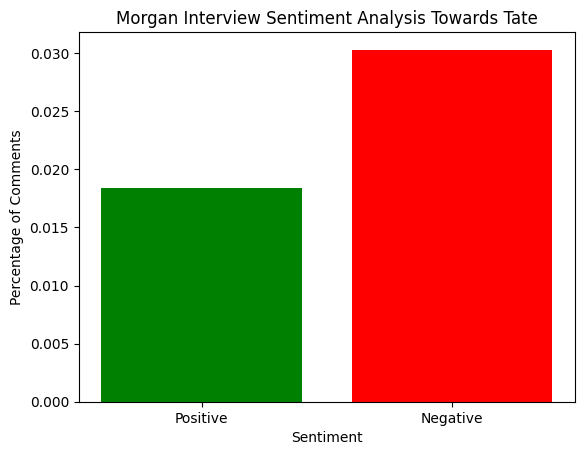

0.04869886838976707

In [ ]:
sid = SentimentIntensityAnalyzer()

positive_comments = []
negative_comments = []

for index, row in df.iterrows():
    comment = row['Comment']
    sentiment_score = sid.polarity_scores(comment)['compound']
    if sentiment_score >= 0.9:
        positive_comments.append(comment)
    elif sentiment_score <= -0.9:
        negative_comments.append(comment)

positive_count = len(positive_comments)
negative_count = len(negative_comments)

plt.bar(['Positive', 'Negative'], [positive_count / len(df), negative_count / len(df)], color=['green', 'red'])
plt.xlabel('Sentiment')
plt.ylabel('Percentage of Comments')
plt.title('Morgan Interview Sentiment Analysis Towards Tate')
plt.show()

positive_count / len(df) + negative_count / len(df)

In [ ]:
df

,Comment,Anonymized Author,Published At,Likes,Reply Count
0,What babies names,3d16a803bd99d942d15b76fb4c6c2a3bae9583f824eab7...,2023-11-25T20:00:22Z,0.0,0.0
1,And when Israel fires gun during Ramadan Was t...,354a96d9cb471c3ee85411ed6d388c37bbb1ffd2ade94b...,2023-11-24T09:42:12Z,0.0,0.0
2,Have a conversation great piece of advice,327ed320d65145cb05729cbff1614b99f8bfd334c67176...,2023-12-08T11:26:44Z,0.0,0.0
3,May Allah give you stead fast Tate,08f721db018dbdc288535227b09a60abebf542eb146c9b...,2023-11-26T06:51:12Z,0.0,0.0
4,Andrewtate you are a real man thats we all lik...,d4a1fd582dc0da79dd113d6d082507510a630d398d8915...,2023-11-26T05:53:37Z,0.0,0.0
...,...,...,...,...,...
22706,Andrews mind is so twisted I feel bad for him,771fd8df6654f897cc7824e60bdc0345e777c7cb60bbee...,2023-11-24T17:10:56Z,1.0,0.0
22707,Something of Ali Gi around this conversation,d29af2ae9d9b9efd32858bae4b0043dcc84262973b5370...,2023-12-17T13:48:09Z,0.0,0.0
22708,,865ddce98fa42cb08f6d08277b49771a0b12703ae96f48...,2023-11-24T11:12:22Z,0.0,0.0
22709,Top G,ca2ecc9a6f9fb76f2348dc1ebcfcae9ea488f8f00f85d3...,2023-12-01T08:15:29Z,0.0,0.0


In [ ]:
"""
piers comments to look at:

mental health and male influence
- 2174
- 13048


Piers Video:
- 58:39
- 1:01:30

Piers (previous) video:
- 50:00 (ghost argument)
"""